In [88]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
from dotenv import load_dotenv
import os
import json

load_dotenv()
api_key=os.getenv("API_KEY")

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'api_key',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [2]:
type(data)

dict

In [5]:
import pandas as pd


pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [7]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')


In [9]:
df_all = pd.DataFrame()

def api_runner():

    global df_all
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'a58e3f87-f86f-4962-8841-1a5eef3c0a8d',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    df = pd.json_normalize(data['data'])
    df['Timestamp'] = pd.to_datetime('now')
    df_all = pd.concat([df_all, df], ignore_index=True)

    if not os.path.isfile('crypto_dataset.csv'):
        df.to_csv('crypto_dataset.csv', header='column_names')
    else:
        df.to_csv('crypto_dataset.csv', mode='a', header=False)
    

In [52]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API RUNNER completed')
    sleep(60)
exit()

API RUNNER completed
API RUNNER completed
API RUNNER completed
API RUNNER completed
API RUNNER completed
API RUNNER completed
API RUNNER completed
API RUNNER completed
API RUNNER completed
API RUNNER completed
API RUNNER completed
API RUNNER completed
API RUNNER completed


KeyboardInterrupt: 

In [54]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [57]:
df3=df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()


In [59]:
df4 = df3.stack()


In [61]:
type(df4)

pandas.core.series.Series

In [63]:
df5 = df4.to_frame(name='values')

In [66]:
type(df5)

pandas.core.frame.DataFrame

In [68]:
df5.count()

values    90
dtype: int64

In [70]:
index = pd.Index(range(90))

df6 = df5.reset_index()


In [72]:
df7 = df6.rename(columns={'level_1': 'percent_change'})


In [74]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])


In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

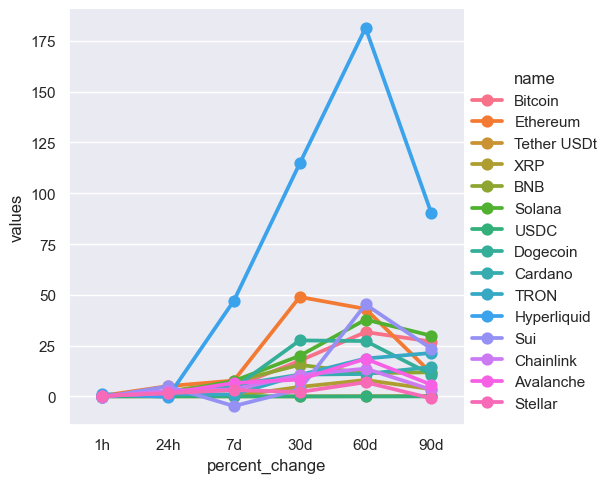

In [78]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [80]:
df = pd.read_csv('crypto_dataset.csv')

In [82]:
print(df.columns)

Index(['Unnamed: 0', 'id', 'name', 'symbol', 'slug', 'num_market_pairs',
       'date_added', 'tags', 'max_supply', 'circulating_supply',
       'total_supply', 'infinite_supply', 'platform', 'cmc_rank',
       'self_reported_circulating_supply', 'self_reported_market_cap',
       'tvl_ratio', 'last_updated', 'quote.USD.price', 'quote.USD.volume_24h',
       'quote.USD.volume_change_24h', 'quote.USD.percent_change_1h',
       'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d',
       'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d',
       'quote.USD.percent_change_90d', 'quote.USD.market_cap',
       'quote.USD.market_cap_dominance', 'quote.USD.fully_diluted_market_cap',
       'quote.USD.tvl', 'quote.USD.last_updated', 'platform.id',
       'platform.name', 'platform.symbol', 'platform.slug',
       'platform.token_address', 'Timestamp'],
      dtype='object')


In [84]:
df8 = df[['name', 'quote.USD.price', 'Timestamp']].copy()
df8['Timestamp'] = pd.to_datetime(df8['Timestamp'])
df8['Timestamp'] = df8['Timestamp'].dt.strftime('%d-%m %H:%M')
df8 = df8.query("name == 'Bitcoin'")

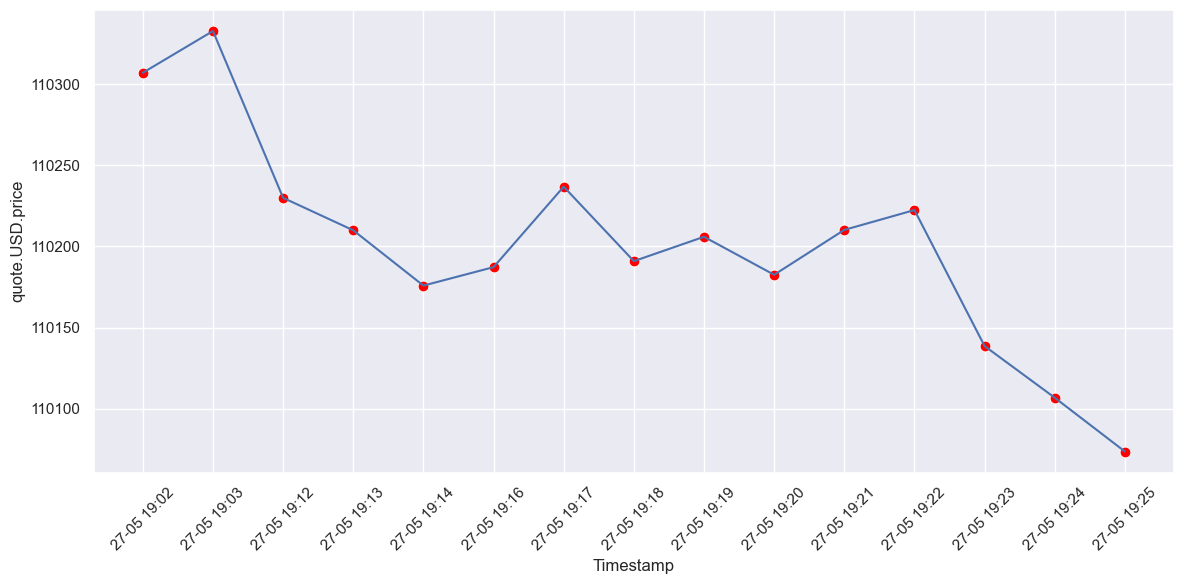

In [86]:
plt.figure(figsize=(12, 6))
sns.set_theme(style="darkgrid")

# Linia
sns.lineplot(x='Timestamp', y='quote.USD.price', data=df8)

# Punkty
sns.scatterplot(x='Timestamp', y='quote.USD.price', data=df8, color='red', s=60)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()